In [11]:
import pandas as pd
import math


## Part 1 - Importing data
# Importing the data
df = pd.read_csv("AirlineDelayData.csv")  # Removed the explicit path, assuming it's in the same directory

## Part 2 - Converting Longitude and Latitude to Radians
## Because there were rows in the data for the same airport with multiple carriers, I took the delay data for those airports by averaging across all carriers common to the same airport.
columns_to_average = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'latitude_N', 'Unnamed: 5', 'Unnamed: 6', 'longitude_W', 'Unnamed: 8', 'Unnamed: 9', 'arr_flights', 'arr_del15', 'arr_delay']

# Grouping data by airport and calculating averages, using .reset function to reconvert the indexed columns into normal columns.
df_airport = df.groupby(['airport', 'airport_name'])[columns_to_average].mean().reset_index()

# Copying Long and Latitude data from original dataframe.
long_data = df_airport[['longitude_W', 'Unnamed: 8', 'Unnamed: 9']].values
lat_data = df_airport[['latitude_N', 'Unnamed: 5', 'Unnamed: 6']].values

# Creating function for converting long and lat data into radians.
def convert_dms_to_radians(dms_triple):
    degrees = dms_triple[0]
    minutes = dms_triple[1] / 60
    seconds = dms_triple[2] / 3600
    return math.radians(degrees + minutes + seconds)

long_radians = [convert_dms_to_radians(dms) for dms in long_data]
lat_radians = [convert_dms_to_radians(dms) for dms in lat_data]

# Add radians data to the dataframe
df_airport['longitude_radians'] = long_radians
df_airport['latitude_radians'] = lat_radians

print(df_airport[['airport','airport_name','longitude_radians','latitude_radians']]) #print only the relevant columns.

#Optional: remove the unamed columns
df_airport = df_airport.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 8','Unnamed: 9'], axis =1)

#Optional: save the modified dataframe to a new csv
#df_airport.to_csv("Airport_Delay_Radians.csv", index=False)

   airport                                       airport_name  \
0      ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...   
1      AUS       Austin, TX: Austin - Bergstrom International   
2      BNA             Nashville, TN: Nashville International   
3      BOS                    Boston, MA: Logan International   
4      BWI  Baltimore, MD: Baltimore/Washington Internatio...   
5      CLT     Charlotte, NC: Charlotte Douglas International   
6      DAL                      Dallas, TX: Dallas Love Field   
7      DCA  Washington, DC: Ronald Reagan Washington National   
8      DEN                   Denver, CO: Denver International   
9      DFW  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...   
10     DTW            Detroit, MI: Detroit Metro Wayne County   
11     EWR           Newark, NJ: Newark Liberty International   
12     FLL  Fort Lauderdale, FL: Fort Lauderdale-Hollywood...   
13     HNL        Honolulu, HI: Daniel K Inouye International   
14     HOU               

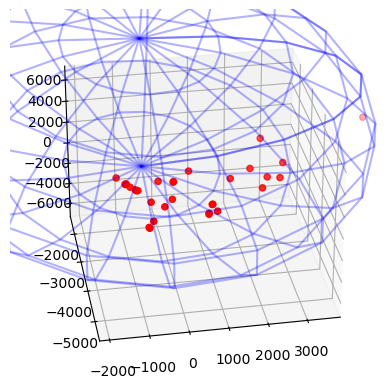

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Part 3 - Plotting the data on a 3D scatter plot
# Create the figure and 3d axes
# Constants for Earth 
EARTH_RADIUS = 6371  # Approximate radius

# Converting radians to spherical coordinates (for plotting on a sphere), using internet source to find out this formula: https://stackoverflow.com/questions/15211776/earth-latitude-longitude-to-latitude-longitude-on-a-3d-sphere
def radians_to_spherical(longitude, latitude):
    theta = longitude + np.pi
    phi = np.pi / 2 - latitude 
    x = EARTH_RADIUS * np.sin(phi) * np.cos(theta) 
    y = EARTH_RADIUS * np.sin(phi) * np.sin(theta)
    z = EARTH_RADIUS * np.cos(phi)
    return x, y, z

# Finding bounds of the data with a buffer, to ensure that the only the relevant regions of the plotted data are shown and not the whole sphere. 
min_lon = min(long_radians) - 0.05  
max_lon = max(long_radians) + 0.05
min_lat = min(lat_radians) - 0.05
max_lat = max(lat_radians) + 0.05

# Converting bounds to spherical for setting limits correctly
min_lon_3d, min_lat_3d, _ = radians_to_spherical(min_lon, min_lat)
max_lon_3d, max_lat_3d, _ = radians_to_spherical(max_lon, max_lat)

# Getting spherical coordinates from radian data
x, y, z = zip(*[radians_to_spherical(lon, lat) for lon, lat in zip(long_radians, lat_radians)])

# Creating the figure and 3d axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating a wireframe sphere of the surface of the earth for better visibility
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
sphere_x = EARTH_RADIUS * np.cos(u) * np.sin(v)
sphere_y = EARTH_RADIUS * np.sin(u) * np.sin(v)
sphere_z = EARTH_RADIUS * np.cos(v)
ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color="blue", alpha=0.3)

# Plotting the data points on the sphere
ax.scatter3D(x, y, z, color='red')  

# Adjusting limits based on bounds
ax.set_xlim([min_lon_3d, max_lon_3d])
ax.set_ylim([min_lat_3d, max_lat_3d])

# Setting view settings to optimize best angle for viewing the plot
elev = 30
azim = -100
ax.view_init(elev, azim) 

plt.show()

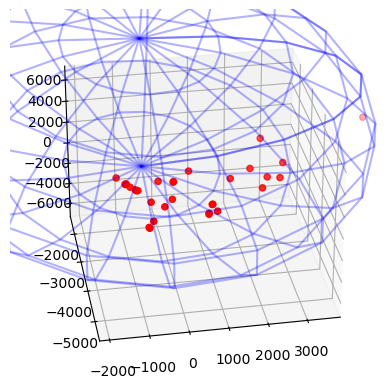

In [31]:
import matplotlib.pyplot as plt

## Part 3 - Plotting the data on a 3D scatter plot
# Create the figure and 3d axes
# Constants for Earth 
EARTH_RADIUS = 6371  # Approximate radius

# Converting radians to spherical coordinates (for plotting on a sphere), using internet source to find out this formula: https://stackoverflow.com/questions/15211776/earth-latitude-longitude-to-latitude-longitude-on-a-3d-sphere
def radians_to_spherical(longitude, latitude):
    theta = longitude + np.pi
    phi = np.pi / 2 - latitude 
    x = EARTH_RADIUS * np.sin(phi) * np.cos(theta) 
    y = EARTH_RADIUS * np.sin(phi) * np.sin(theta)
    z = EARTH_RADIUS * np.cos(phi)
    return x, y, z

# Finding bounds of the data with a buffer, to ensure that the only the relevant regions of the plotted data are shown and not the whole sphere. 
min_lon = min(long_radians) - 0.05  
max_lon = max(long_radians) + 0.05
min_lat = min(lat_radians) - 0.05
max_lat = max(lat_radians) + 0.05

# Converting bounds to spherical for setting limits correctly
min_lon_3d, min_lat_3d, _ = radians_to_spherical(min_lon, min_lat)
max_lon_3d, max_lat_3d, _ = radians_to_spherical(max_lon, max_lat)

# Getting spherical coordinates from radian data
x, y, z = zip(*[radians_to_spherical(lon, lat) for lon, lat in zip(long_radians, lat_radians)])

# Creating the figure and 3d axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating a wireframe sphere of the surface of the earth for better visibility
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
sphere_x = EARTH_RADIUS * np.cos(u) * np.sin(v)
sphere_y = EARTH_RADIUS * np.sin(u) * np.sin(v)
sphere_z = EARTH_RADIUS * np.cos(v)
ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color="blue", alpha=0.3)

# Plotting the data points on the sphere
ax.scatter3D(x, y, z, color='red')  

# Adjusting limits based on bounds
ax.set_xlim([min_lon_3d, max_lon_3d])
ax.set_ylim([min_lat_3d, max_lat_3d])

# Setting view settings to optimize best angle for viewing the plot
elev = 30
azim = -100
ax.view_init(elev, azim) 

plt.show()


In [33]:

#%%
### Exercise 8.1.2
## Calculating total delay time
delay_vars = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Calculate percentage delays, handling potential division by zero
for var in delay_vars:
    new_col_name = var + '_pct'
    df_airport[new_col_name] = (df_airport[var] / df_airport['arr_delay']) * 100
    df_airport[new_col_name] = df_airport[new_col_name].fillna(0) #Fill nan with 0

# Calculate total percentage delay
pct_delay_cols = [var + '_pct' for var in delay_vars]
df_airport['pct_delay_sum'] = df_airport[pct_delay_cols].sum(axis=1)

# Handle cases where arr_delay was 0, and therefore pct_delay_sum is nan.
df_airport['pct_delay_sum'] = df_airport['pct_delay_sum'].fillna(0)

# Print the result
print(df_airport[['pct_delay_sum']])

#Optional check that arr_delay is not null before calculating percentages.
if df_airport['arr_delay'].isnull().any():
    print("Warning: arr_delay contains null values.")

    pct_delay_sum
0           100.0
1           100.0
2           100.0
3           100.0
4           100.0
5           100.0
6           100.0
7           100.0
8           100.0
9           100.0
10          100.0
11          100.0
12          100.0
13          100.0
14          100.0
15          100.0
16          100.0
17          100.0
18          100.0
19          100.0
20          100.0
21          100.0
22          100.0
23          100.0
24          100.0
25          100.0
26          100.0
27          100.0
28          100.0
29          100.0
30          100.0


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
import seaborn as sns

### Exercise 8.1.3
## Solving the Canonical Component Analysis Problem for X and Y
Location_Matrix = {'lat_radians': lat_radians, 'long_radians': long_radians}
X = pd.DataFrame(Location_Matrix)

delay_vars = ['carrier_delay_pct', 'weather_delay_pct', 'nas_delay_pct', 'security_delay_pct', 'late_aircraft_delay_pct']

pct_delay_matrix_df = df_airport[delay_vars]
# Converting to a NumPy matrix
Y = pct_delay_matrix_df.to_numpy()

# Checking dimensions
print(X.shape)
print(Y.shape) 

## Solving the Principal Component Analysis Problem for Y, by writing a custom function for calculating the Principal Components and Visualizng them. 
def my_pca(Y, n_components=2):
    # Centering the data
    Y_mean = Y.mean(axis=0)
    Y_centered = Y - Y_mean

    # Calculating the covariance matrix
    cov_matrix = np.cov(Y_centered.T)

    # Eigendecomposing the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting components by decreasing variance
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Selecting principal components
    components = eigenvectors[:, :n_components]
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)

    # Projecting data onto principal components
    Y_pca = np.dot(Y_centered, components)

    return Y_pca, components, explained_variance_ratio 

print(my_pca(Y, 2))
Y_scaled = StandardScaler().fit_transform(Y)
Y_pca, components, explained_variance_ratio = my_pca(Y_scaled, n_components=5) 
print(explained_variance_ratio)

print(components)

plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1]) 
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

'''
Interpretation of the results of the PCA of Y
    1. The results show that PC1 explains 36.7% of the variance while PC2 explain 32.3% of the variance. 
    2. This implies that almost 69% of the variance in the data is being explained by the first two principal components.
    3. PC1 is stronhly influenced by carrier, weather, and late delay variables.
    4. PC2 is strongly driven by weather and NAS delay, which might show how weather-related delays might relate to the efficiency of the NAS. 
    
'''

## Solving the CCA problem for X and Y.
# Using built-in CCA function from sklearn library. 
cca = CCA(n_components=2) 
cca.fit(X, Y)
X_cca, Y_cca = cca.transform(X, Y)

# Correlation between original variables in X and Y
corr_matrix_XY = np.corrcoef(X.T, Y.T) 

print("Correlation Matrix X & Y:\n", corr_matrix_XY)

# Heatmap for Correlation Matrix X and Y
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_XY, annot=True, cmap='coolwarm') 
plt.title("Correlation Matrix X and Y")
plt.show()
'''
Interpretation for the correlation matrix for X and Y:
    1. Generally, the X and Y variables do not show a strong correlation.
    2. From between X and Y, the matrix shows that delays due to causes within the airline's control (carrier-delay_pct) had the strongest 
        correlation with the latitude variable, however, in general terms, it was not that strong.
    3. For the correlations between the causes of the delay matrix, the strongest correlation was between the Air carrier delays and the NAS 
        delay, which implies that when there were a high number of delays due to circumstances within the airline's control, the number of
        delays due to NAS were lower, as shown by the -0.62 value. 

'''
#%%

## Solving the CCA Problem for Y` which takes into account the number of flights. 
delay_vars = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

for var in delay_vars:
    df_airport[var + '_prop'] = df_airport[var] / df_airport['arr_flights']

#Y_prime is a list of variables that show the delay causes proportions.
Y_prime = df_airport[['carrier_delay_prop', 'weather_delay_prop', 'nas_delay_prop', 'security_delay_prop', 'late_aircraft_delay_prop']].to_numpy()

cca = CCA(n_components=2)
cca.fit(X, Y_prime)
X_cca, Y_prime_cca = cca.transform(X, Y_prime)

# Correlation between original variables in X and Y_prime
corr_matrix_XY_prime = np.corrcoef(X.T, Y_prime.T)
print("Correlation Matrix X & Y':\n", corr_matrix_XY_prime)

# Heatmap for Correlation Matrix X and Y
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_XY_prime, annot=True, cmap='coolwarm') 
plt.title("Correlation Matrix X and Y`")
plt.show()

'''
Interpretation for the correlation matrix for X and Y prime:
    1. Airports located further north may experience a slightly higher tendency for several types of delays. 
        The strongest negative correlation (-0.45) is between latitude and the delay due to security issues.
    2. Correlations between location and delay proportions are generally weak to moderate (e.g., values ranging from -0.45 to around 0.15 ). 
        This suggests other factors might have a stronger influence.
    3. The analysis reveals interesting relationships among the delay proportions themselves, indicating how different delay types might be linked at airports. 
        Look for strong positive or negative correlations in the 3rd through 7th columns of your matrix.
    
'''
### END OF CODE ###

(31, 2)
(31, 5)
(array([[-13.98760076, -10.63380316],
       [  6.42276918,   8.17863382],
       [ -4.6049494 ,  12.59259102],
       [ -7.40840858,   0.64022784],
       [  8.73490034,  14.34003149],
       [ -4.54420645,   7.52021292],
       [ 10.08129241,   6.84247338],
       [ -3.9777577 ,  11.81886665],
       [ -3.5425019 ,  -2.71088276],
       [ -5.6816943 ,  -2.07116525],
       [-16.05859154, -10.8573219 ],
       [ 20.48639639, -11.59411347],
       [ 18.78067847, -12.44340855],
       [  4.92068246,   0.1810209 ],
       [  1.92879259,  16.61025592],
       [ -7.3372429 ,  -4.53009397],
       [  8.34799803,  -3.80728883],
       [  4.13429773,  -6.91586531],
       [ 24.90370986,  -5.0320524 ],
       [ -5.64138122,   3.73535273],
       [ 14.54364997, -10.85583452],
       [  7.88101318,   0.55473253],
       [ -2.66264117,  16.06299449],
       [ 10.25676269,   0.62101433],
       [-21.04817426, -19.61894862],
       [ -2.86516197, -10.25507643],
       [ -6.9014572 ,

NameError: name 'StandardScaler' is not defined